<a href="https://colab.research.google.com/github/andersonkstro/Meu-Portfolio/blob/master/ProjetoHamburgueria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset da Hamburgueria2047 do município de Marabá-PA.

Vamos analisar as vendas por dias da semana, meses do ano e suas categorias.

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date
import datetime as dt

sns.set_style()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análise exploratória

In [ ]:
# Importando o dataset

df = pd.read_excel('/content/Cópia de Historico_Itens_Vendidos de 01-01-18 à 31-12-18.xlsx')

In [ ]:
# Verificando as primeiras linhas do dataset
df.head()

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.
0,2018-03-05 19:03:29.296,1,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,6187.0,NaN,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago
1,2018-03-05 19:06:18.572,1,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
2,2018-03-05 19:06:24.578,1,3.0,3.0,Produto,COCA COLA LATA,Produto,Refrigerantes,4.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
3,2018-03-05 19:10:04.523,1,15.0,15.0,Produto,207 CLÁSSICO,Produto,Hambúrgueres,15.0,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago
4,2018-03-05 19:10:04.523,1,1.5,1.5,Complemento,QUEIJO ADICIONAL,Complemento,Complemento,1.5,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago


In [ ]:
# Informações adicionais do nosso conjunto de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data/Hora Item    10532 non-null  datetime64[ns]
 1   Qtd.              10533 non-null  int64         
 2   Valor Un. Item    10532 non-null  float64       
 3   Valor. Tot. Item  10533 non-null  float64       
 4   Tipo de Item      10532 non-null  object        
 5   Nome Prod.        10532 non-null  object        
 6   Tipo Prod.        10532 non-null  object        
 7   Cat. Prod.        10532 non-null  object        
 8   Valor Prod.       10532 non-null  float64       
 9   Cod. Ped.         10532 non-null  float64       
 10  Núm. Mesa/Com.    2267 non-null   float64       
 11  Data Ab. Ped.     10532 non-null  datetime64[ns]
 12  Data Fec. Ped.    10532 non-null  datetime64[ns]
 13  Tipo Ped.         10532 non-null  object        
 14  Stat. Ped.        1053

In [ ]:
# Verificando o tamanho do conjunto de dados
df.shape

(10533, 15)

In [ ]:
# Valores nulos
df.isnull().sum()

Data/Hora Item         1
Qtd.                   0
Valor Un. Item         1
Valor. Tot. Item       0
Tipo de Item           1
Nome Prod.             1
Tipo Prod.             1
Cat. Prod.             1
Valor Prod.            1
Cod. Ped.              1
Núm. Mesa/Com.      8266
Data Ab. Ped.          1
Data Fec. Ped.         1
Tipo Ped.              1
Stat. Ped.             1
dtype: int64

In [ ]:
# Percentual de valores nulos
df.isnull().sum() / df.shape[0] * 100

Data/Hora Item       0.009494
Qtd.                 0.000000
Valor Un. Item       0.009494
Valor. Tot. Item     0.000000
Tipo de Item         0.009494
Nome Prod.           0.009494
Tipo Prod.           0.009494
Cat. Prod.           0.009494
Valor Prod.          0.009494
Cod. Ped.            0.009494
Núm. Mesa/Com.      78.477167
Data Ab. Ped.        0.009494
Data Fec. Ped.       0.009494
Tipo Ped.            0.009494
Stat. Ped.           0.009494
dtype: float64

In [ ]:
# Observando dados estatísticos do nosso conjunto de dados
df.describe()

,Qtd.,Valor Un. Item,Valor. Tot. Item,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.
count,10533.000000,10532.000000,10533.000000,10532.000000,10532.000000,2267.000000
mean,2.179816,13.239271,29.048894,13.475978,8922.573111,7.341420
std,111.847651,7.106302,1490.539012,6.910087,1503.848371,18.970337
min,1.000000,1.000000,1.000000,1.000000,6187.000000,1.000000
25%,1.000000,5.000000,5.500000,6.000000,7636.000000,1.000000
50%,1.000000,15.000000,15.000000,16.000000,8943.500000,2.000000
75%,1.000000,20.000000,20.000000,20.000000,10287.250000,7.000000
max,11480.000000,30.000000,152986.000000,22.000000,11369.000000,102.000000


In [ ]:
# Removendo colunas com valores nulos

df.drop(["Cod. Ped."], axis=1, inplace=True)
df.drop(["Núm. Mesa/Com."], axis=1, inplace=True)

In [ ]:
# Resultado
df.isnull().sum()

Data/Hora Item      1
Qtd.                0
Valor Un. Item      1
Valor. Tot. Item    0
Tipo de Item        1
Nome Prod.          1
Tipo Prod.          1
Cat. Prod.          1
Valor Prod.         1
Data Ab. Ped.       1
Data Fec. Ped.      1
Tipo Ped.           1
Stat. Ped.          1
dtype: int64

In [ ]:
# últimos registros do nosso dataset

df.tail(2)

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.
10531,2018-12-30 22:47:23.911,1,6.5,6.5,Produto,COCA COLA 1 LT,Produto,Refrigerantes,6.5,2018-12-30 22:30:08.793,2018-12-30 23:01:08.671,Mesa/Comanda,Finalizado Pago
10532,NaT,11480,NaN,152986.0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [ ]:
# removendo a última linha que contém valores em branco (NaN)

df.drop([10532], axis=0, inplace=True)

In [ ]:
# Conferindo o resultado

df.tail(2)

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido
10530,2018-12-30 22:41:59.290,1,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10531,2018-12-30 22:47:23.911,1,6.5,6.5,COCA COLA 1 LT,Produto,Refrigerantes,6.5,2018-12-30 22:30:08.793,2018-12-30 23:01:08.671,Mesa/Comanda


In [ ]:
# consultando novament os valores missing
df.isnull().sum()

Data/Hora Item      0
Qtd.                0
Valor Un. Item      0
Valor. Tot. Item    0
Tipo de Item        0
Nome Prod.          0
Tipo Prod.          0
Cat. Prod.          0
Valor Prod.         0
Data Ab. Ped.       0
Data Fec. Ped.      0
Tipo Ped.           0
Stat. Ped.          0
dtype: int64

In [ ]:
# Colunas do nosso dataset

df.columns

Index(['Data/Hora Item', 'Qtd.', 'Valor Un. Item', 'Valor. Tot. Item',
       'Tipo de Item', 'Nome Prod.', 'Tipo Prod.', 'Cat. Prod.', 'Valor Prod.',
       'Data Ab. Ped.', 'Data Fec. Ped.', 'Tipo Ped.', 'Stat. Ped.'],
      dtype='object')

In [ ]:
# criando um dicionário com novos nomes das colunas

colunaNova = ['Data', 'Qtd', 'ValorUnidade', 'TotalUnidade',
       'TipoItem', 'Produto', 'TipoProduto', 'Categoria', 'ValorProduto',
       'HoraAbertPed', 'HoraFechPed', 'TipoPedido', 'StatuSPedido']

# Aplicando ao dataset
df.columns = colunaNova

In [ ]:
df.head(2)

,Data,Qtd,ValorUnidade,TotalUnidade,TipoItem,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido,StatuSPedido
0,2018-03-05 19:03:29.296,1,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago
1,2018-03-05 19:06:18.572,1,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago


In [ ]:
# removendo colunas que não serão usadas no projeto
df.drop(["TipoItem"], axis=1, inplace=True)
df.drop(["StatuSPedido"], axis=1, inplace=True)

In [ ]:
# Novo Dataset
df.head()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido
0,2018-03-05 19:03:29.296,1,17.0,17.0,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery
1,2018-03-05 19:06:18.572,1,22.0,22.0,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery
2,2018-03-05 19:06:24.578,1,3.0,3.0,COCA COLA LATA,Produto,Refrigerantes,4.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery
3,2018-03-05 19:10:04.523,1,15.0,15.0,207 CLÁSSICO,Produto,Hambúrgueres,15.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery
4,2018-03-05 19:10:04.523,1,1.5,1.5,QUEIJO ADICIONAL,Complemento,Complemento,1.5,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery


**Verificar os valores nulos novamente do nosso conjunto de dados.**

---



---



## Feature engineering

---



---



---



In [ ]:
# convertendo a coluna Data para o formato Datetime

df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
# Resultado

df['Data']

0       2018-03-05 19:03:29.296
1       2018-03-05 19:06:18.572
2       2018-03-05 19:06:24.578
3       2018-03-05 19:10:04.523
4       2018-03-05 19:10:04.523
                  ...          
10527   2018-12-30 22:37:38.913
10528   2018-12-30 22:37:39.490
10529   2018-12-30 22:41:57.277
10530   2018-12-30 22:41:59.290
10531   2018-12-30 22:47:23.911
Name: Data, Length: 10532, dtype: datetime64[ns]

In [ ]:
# Vamos extrair através da função lambda novas variáveis como as horasm minutos e segundos
# e assim criado novas colunas para nosso dataset

df["HoraAbertura"] = df["HoraAbertPed"].apply(lambda x:dt.time(x.hour, x.minute, x.second))
df["HoraFechamento"] = df["HoraFechPed"].apply(lambda x:dt.time(x.hour, x.minute, x.second))

In [ ]:
# Extraindo e criando colunas de Dias da Semana, Mês e Hora.

df["DiaSemana"] = df["Data"].apply(lambda x: x.dayofweek)
df["Mes"] = df["Data"].apply(lambda x: x.month)
df["Hora"] = df["Data"].apply(lambda x: dt.time(x.hour))

In [ ]:
# Criando um dicionário com os nomes dos dias da semana

dias = {0:"Seg",1:"Ter",2:"Qua",3:"Qui",4:"Sex",5:"Sab",6:"Dom"}

#Criando um dicionário com as inicais dos meses do ano.
meses = {1:"Jan",2:"Fev",3:"Mar",4:"Abr",5:"Mai",6:"Jun",7:"Jul",8:'Ago',9:"Set",10:"Out",11:"Nov",12:"Dez"}

# Atribuindo os nomes para a coluna DiaSemana

df["DiaSemana"] = df["DiaSemana"].map(dias)

# Atribuindo os nomes para os meses.

df["Mes"] = df["Mes"].map(meses)

In [ ]:
# Nosso dataset com as novas variaveis
df.head()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido,HoraAbertura,HoraFechamento,DiaSemana,Mes,Hora
0,2018-03-05 19:03:29.296,1,17.0,17.0,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,19:02:22,19:58:54,Seg,Mar,19:00:00
1,2018-03-05 19:06:18.572,1,22.0,22.0,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,19:06:00,19:59:16,Seg,Mar,19:00:00
2,2018-03-05 19:06:24.578,1,3.0,3.0,COCA COLA LATA,Produto,Refrigerantes,4.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,19:06:00,19:59:16,Seg,Mar,19:00:00
3,2018-03-05 19:10:04.523,1,15.0,15.0,207 CLÁSSICO,Produto,Hambúrgueres,15.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,19:09:11,19:58:35,Seg,Mar,19:00:00
4,2018-03-05 19:10:04.523,1,1.5,1.5,QUEIJO ADICIONAL,Complemento,Complemento,1.5,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,19:09:11,19:58:35,Seg,Mar,19:00:00


# Plotando gráficos



---



---



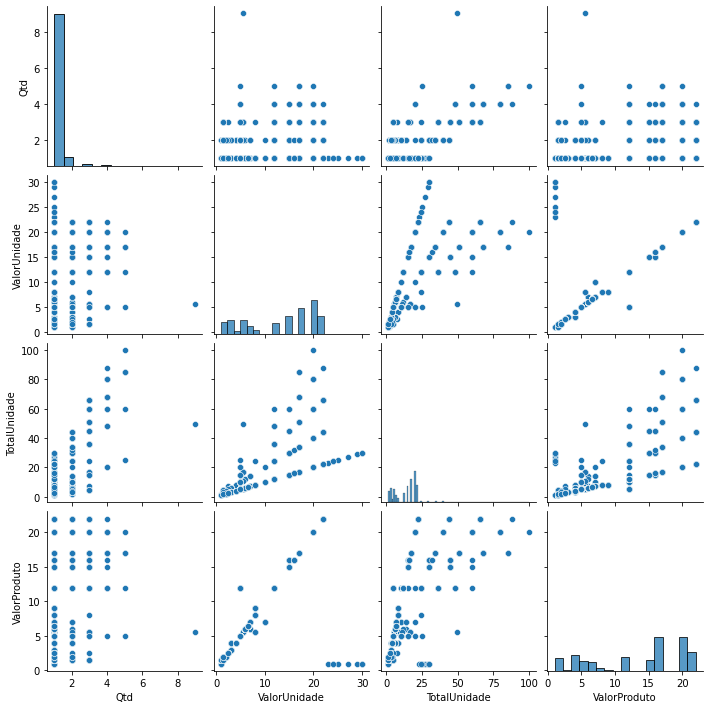

In [ ]:
# Pairplot
sns.pairplot(df)

## **Visulização dos dados.**

Text(0.5, 1.0, 'Pedidos por Horario')

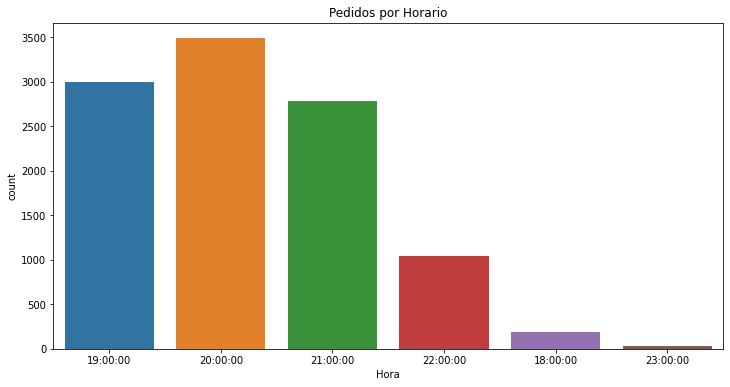

In [ ]:
# Gráfico de barras com pedidos por horários

plt.figure(figsize=(12,6))
sns.countplot(x = "Hora", data=df, palette=None)
plt.title("Pedidos por Horario")

Maior fluxo de pedidos entre 19:00 até as 21:00

Text(0, 0.5, 'Quantidade')

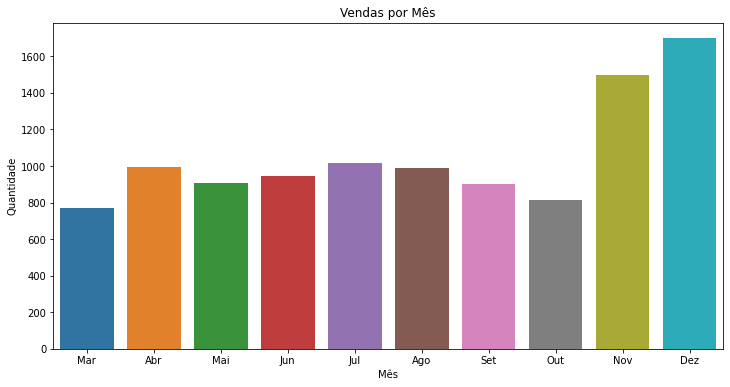

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Mes", data=df, palette=None, order=None, hue_order='Mes')
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade")

O gráfico pmostra que a maior concentração de pedidos está no mês de Dezembro. Em Abril houve um volume diferente em relação aos demais e Novembro disparou.


Text(0, 0.5, 'Quantidade')

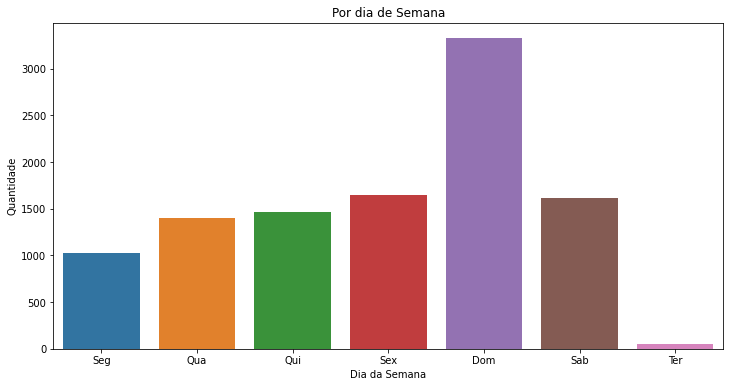

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x= "DiaSemana", data=df, palette=None, hue_order="DiaSemana")
plt.title("Por dia de Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade")

**Domingo é o dia da semana com maior fluxo de pedidos(vendas)

---



In [ ]:
df['TipoPedido'].value_counts() / 100


Delivery        81.77
Mesa/Comanda    22.67
Balcão           0.80
Caixa            0.08
Name: TipoPedido, dtype: float64

Text(0, 0.5, 'Quantidade')

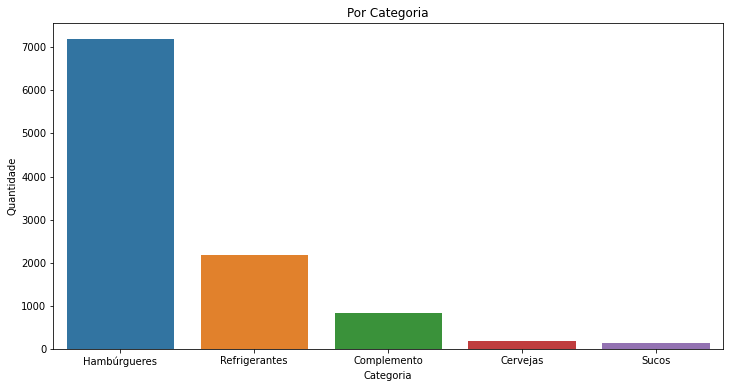

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Categoria", data=df, palette=None)
plt.title("Por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade")

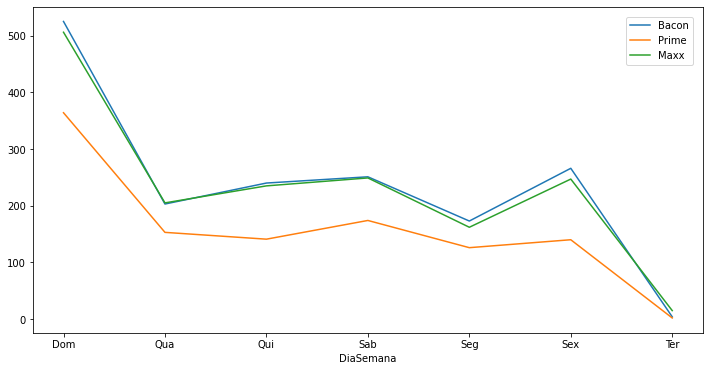

In [ ]:
plt.figure(figsize=(12,6))
df[df['Produto']=='207 +BACON'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=='207 PRIME'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=='207 MAXX'].groupby('DiaSemana').count()['Categoria'].plot()
plt.legend(["Bacon", "Prime", "Maxx"], loc = 0, borderaxespad=1)

In [ ]:
df.dtypes

Data              datetime64[ns]
Qtd                        int64
ValorUnidade             float64
TotalUnidade             float64
Produto                   object
TipoProduto               object
Categoria                 object
ValorProduto             float64
HoraAbertPed      datetime64[ns]
HoraFechPed       datetime64[ns]
TipoPedido                object
HoraAbertura              object
HoraFechamento            object
DiaSemana                 object
Mes                       object
Hora                      object
dtype: object

**Ranking dos Hamburgueres.** 

---



---



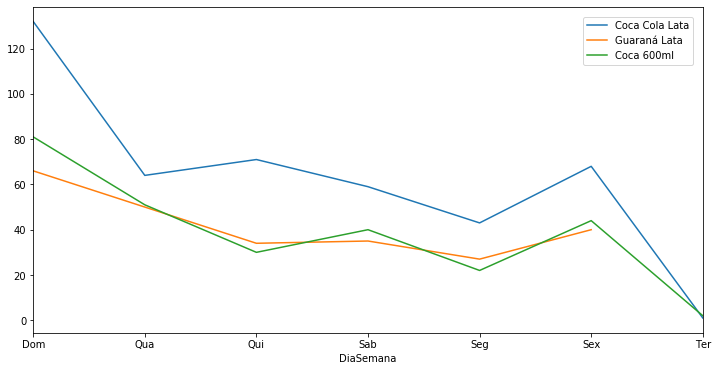

In [ ]:
plt.figure(figsize=(12,6))
df[df['Produto']=='COCA COLA LATA'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=="GUARANÁ ANTÁRTICA LATA"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="COCA COLA 600ML"].groupby("DiaSemana").count()["Categoria"].plot()
plt.legend(["Coca Cola Lata", "Guaraná Lata","Coca 600ml"], loc = 0, borderaxespad=1)

**Ranking dos refrigerantes.**

---



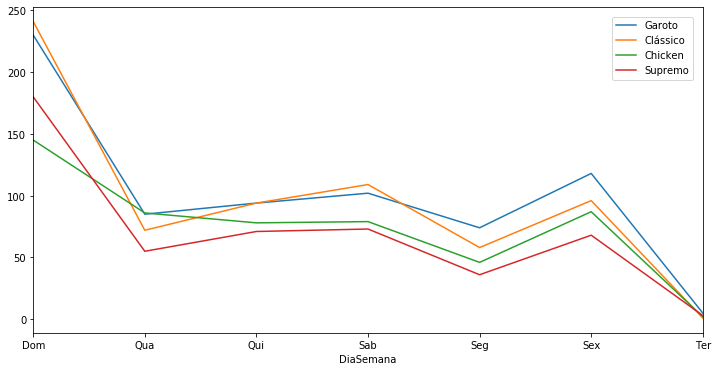

In [ ]:
plt.figure(figsize=(12,6))

plt.legend(["Garoto","Clássico","Chicken","Supremo"], loc=0, borderaxespad=1)